<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [3]:
# load the csv file
df_employee = pd.read_csv('emp_attrition.csv')

# display the first five observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [4]:
# check data types of variables
df_employee.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [5]:
# check the size of data
df_employee.shape

(1580, 18)

In [6]:
# calculate the first quartile
Q1 = df_employee.quantile(0.25)

#calculate the third quartile
Q3 = df_employee.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_employee.shape

(1487, 18)

In [7]:
# reset the row index
df_employee = df_employee.reset_index(drop=True)

**Encode the categorical variables.**

#### Split the dependent and independent variables.

In [8]:
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [9]:
# if the value in the target variable is 'Yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

#### Filter numerical and categorical variables.

In [10]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [11]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [12]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [13]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# iterating a for loop 
# categorizing the variable 'Age'
for i in range(X.shape[0]):
    if X.Age[i]>=18 and X.Age[i]<=30:
        X.Age[i] = "A18-30"
    elif(X.Age[i]>=31 and X.Age[i]<=40):
        X.Age[i] = "A31-40"
    elif(X.Age[i]>=41 and X.Age[i]<=50):
        X.Age[i] = "A41-50"
    else:
        X.Age[i] = "A51-60"
    
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,A31-40,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,A31-40,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,A31-40,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,A41-50,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,A41-50,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# group the dataframe by 'Age'
grp = X.groupby('Age')

# find out the maximum value from the column MonthlyIncome for each age group
grp.MonthlyIncome.max()

Age
A18-30    11935
A31-40    12061
A41-50    11957
A51-60    10976
Name: MonthlyIncome, dtype: int64

**Interpretation:** An employee between the age category 31 to 40 has the highest income i.e. 12061.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# all the dummy encoded categorical variables are present after the index position 9
# thus, taking a subset of X from columns at index position 10 till the last column
X_subset = X.iloc[:, 10:]

In [18]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target, random_state = 10, test_size = 0.2)

# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators to consider
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

# predict the attrition on the test data
y_pred = ada_model.predict(X_test)

# print the accuracy
# rounding the result upto 4 digits
print("The Accuracy is: ", round(accuracy_score(y_test, y_pred), 4))

The Accuracy is:  0.7013


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1189, 32)
y_train (1189,)
X_test (298, 32)
y_test (298,)


In [20]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators to consider
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

# predict the attrition on the test data
y_pred_full = ada_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       170
           1       0.74      0.78      0.76       128

    accuracy                           0.79       298
   macro avg       0.78      0.78      0.78       298
weighted avg       0.79      0.79      0.79       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

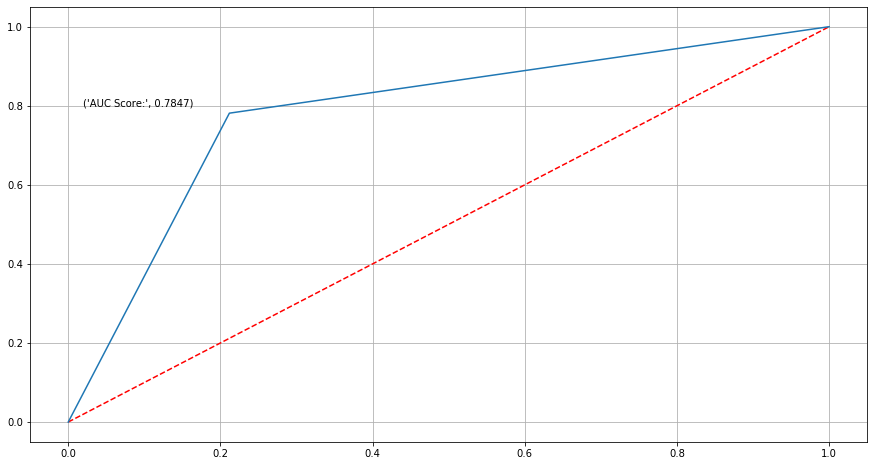

In [21]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

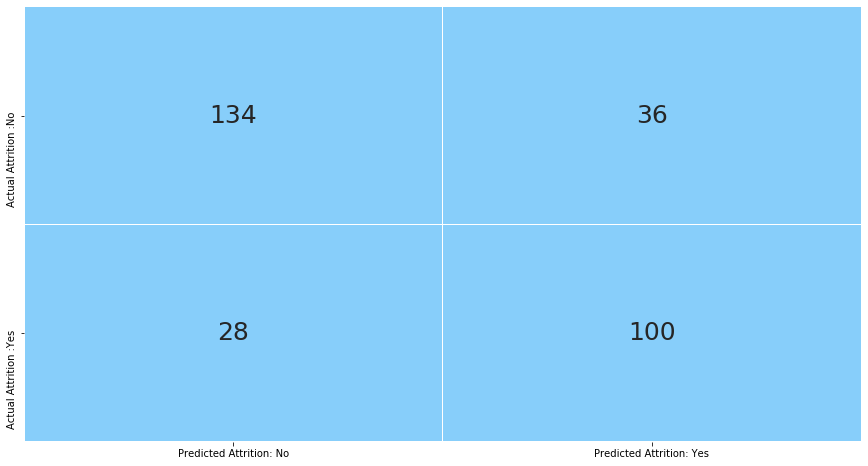

In [22]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_full)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# True Negative from confusion matrix
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False Negative from confusion matrix
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))

Percentage of correctly classified observations:  78.52
Percentage of misclassified observations:  21.48

Specificity:  0.7882
Sensitivity:  0.7812


**Intrepretation:** There is no significant difference between the sensitivity and the specificity. Thus we can say that the model is performing good and it is a stable model. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [24]:
# create a dictionary with hyperparameters and its values
# n_estimators: number of estimators to consider
# max_depth: assigns maximum depth of the tree
# learning_rate: Boosting learning rate
# pass the 'random_state' to obtain the same results for each code implementation
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
 
# instantiate the 'AdaBoostClassifier'
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# n_jobs=-1 tells the model to use all the central processing units 
ada_grid = GridSearchCV(estimator = ada_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5,
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
ada_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for AdaBoost Classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost Classifier:  {'learning_rate': 0.15, 'n_estimators': 350} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# learning_rate: Boosting learning rate
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(learning_rate = ada_grid.best_params_['learning_rate'], 
                               n_estimators = ada_grid.best_params_['n_estimators'], 
                               random_state = 10)

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'roc_auc' for roc-auc score
scores = cross_val_score(estimator = ada_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.84


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each time you run the code
gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 8)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy Score

In [27]:
# predict the attrition on the test data
y_pred_gb = gboost_model.predict(X_test)

print('The accuracy score is ', round(accuracy_score(y_test, y_pred_gb), 4))

The accuracy score is  0.8893


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [28]:
# create a dictionary with hyperparameters and its values
# learning_rate: Boosting learning rate
# n_estimators: number of estimators to consider
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
 
# instantiate the 'GradientBoostingClassifier'
# pass the 'random_state' to obtain the same results for each time you run the code
gboost_model = GradientBoostingClassifier(random_state = 8)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# n_jobs=-1 tells the model to use all the central processing units 
gb_grid = GridSearchCV(estimator = gboost_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5, 
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

Best parameters for Gradient Boositng Classifier:  {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Gradient Boosting Classifier

In [29]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# learning_rate: Boosting learning rate
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# consider the best parameters obtained in Q12
gboost_model = GradientBoostingClassifier(n_estimators = gb_grid.best_params_['n_estimators'], 
                                          max_depth = gb_grid.best_params_['max_depth'], 
                                          learning_rate = gb_grid.best_params_['learning_rate'],
                                          random_state = 8)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
# predict the attrition on the test data
y_pred_gb = gboost_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       170
           1       0.89      0.98      0.93       128

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



Ada Boosting Classifier

In [31]:
# instantiate the 'AdaBoostClassifier'
# pass the 'random_state' to obtain the same results for each code implementation
# consider the best parameters obtained in Q9
ada_model = AdaBoostClassifier(learning_rate = ada_grid.best_params_['learning_rate'], 
                               n_estimators = ada_grid.best_params_['n_estimators'], 
                               random_state = 8)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=350, random_state=8)

In [32]:
# predict the attrition on the test data
y_pred_ada = ada_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       170
           1       0.73      0.74      0.74       128

    accuracy                           0.77       298
   macro avg       0.77      0.77      0.77       298
weighted avg       0.77      0.77      0.77       298



The gradient boosting model(gbm) is giving the highest accuracy and also the values of sensitivity and the specificity are better and high as compared to that of adaboost model. Thus, we can say that gbm is performing better than adaboost model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

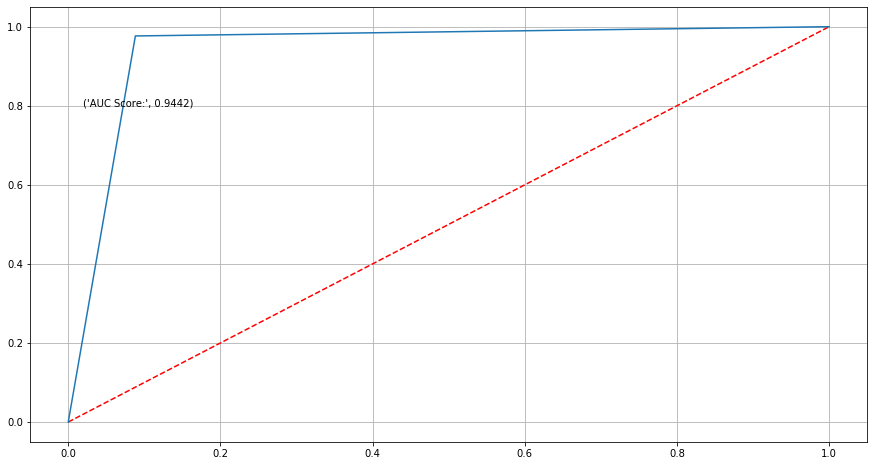

In [33]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_gb),4)))
                               
# plot the grid
plt.grid(True)

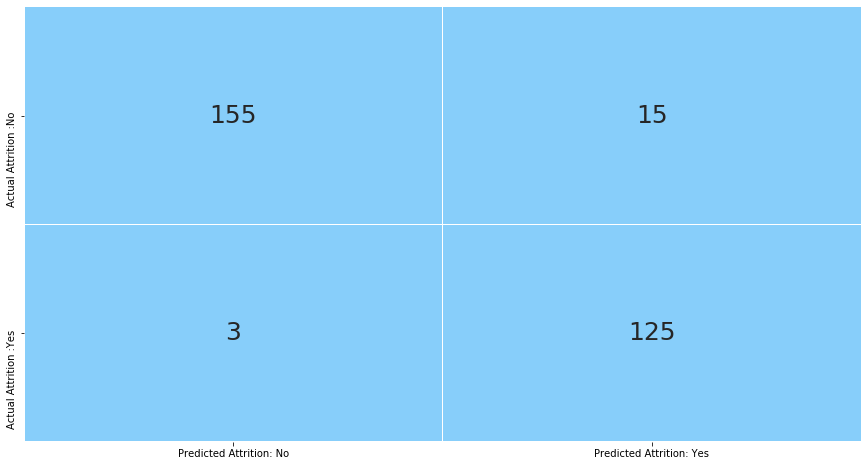

In [34]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_gb)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# instantiate the 'XGBClassifier'
# set the learning rate as 0.01
# set te value of gamma as 2
xgb_model = XGBClassifier(learning_rate = 0.01, gamma = 2)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# predict the attrition on the test data
y_pred_xgb = xgb_model.predict(X_test)

In [37]:
# print the roc_auc score
score = roc_auc_score(y_test, y_pred_xgb)
print('The Roc_Auc Score is ', score)

The Roc_Auc Score is  0.8267463235294119


In [38]:
# print the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       170
           1       0.76      0.86      0.81       128

    accuracy                           0.82       298
   macro avg       0.82      0.83      0.82       298
weighted avg       0.83      0.82      0.82       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [39]:
# create a dictionary with hyperparameters and its values
# gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree.
# learning_rate: Boosting learning rate
# n_estimators: number of estimators to consider
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
 
# instantiate the 'XGBClassifier'
# pass the 'random_state' to obtain the same results for each time you run the code
# n_jobs=-1 tells the model to use all the central processing units 
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# n_jobs=-1 tells the model to use all the central processing units 
xgb_grid = GridSearchCV(estimator = xgb_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5, 
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Extreme Gradient Boositng Classifier: ', xgb_grid.best_params_, '\n')

Best parameters for Extreme Gradient Boositng Classifier:  {'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100} 



In [40]:
# predict the attrition on the test data
y_pred_xgb = xgb_grid.predict(X_test)

In [41]:
# print the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       170
           1       0.83      0.98      0.90       128

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

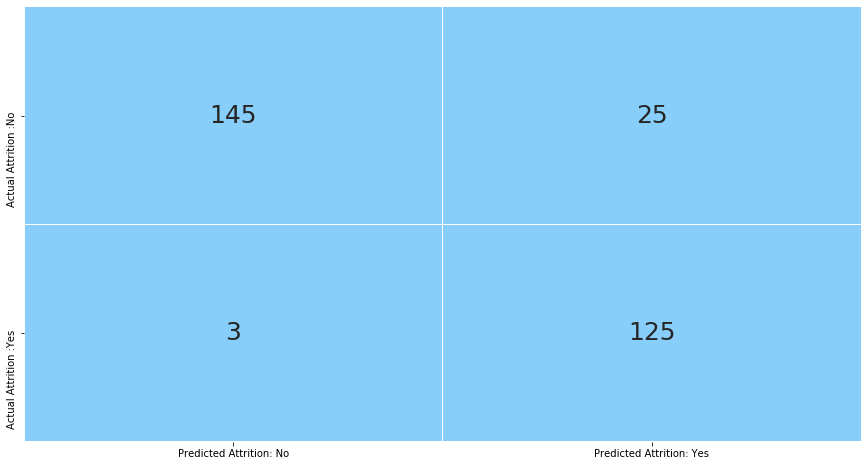

In [42]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_xgb)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

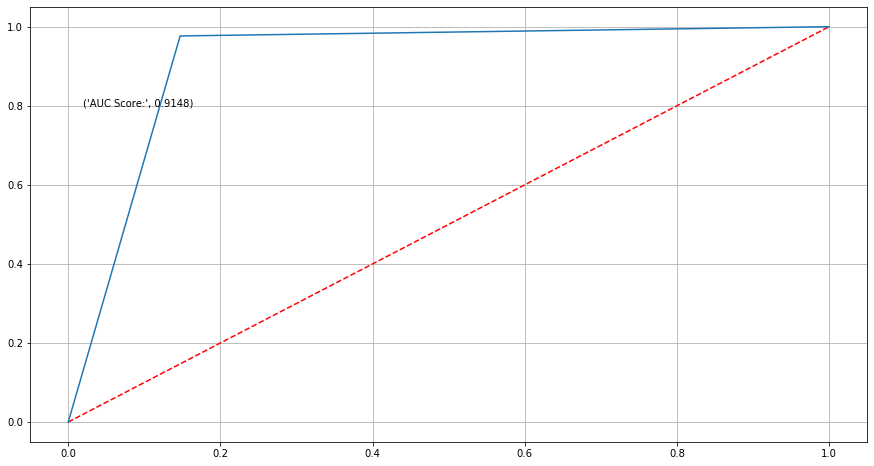

In [43]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_xgb),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# consider the decision tree and random forest algorithms as base learners
# pass the value of K to the parameter, 'n_neighbors'
base_learners = [('Decision Tree', DecisionTreeClassifier()),
                 ('Random Forest', RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the AdaBoost model as the 'final_estimator'/ meta model
# pass the 'random_state' to obtain the same results for each time you run the code
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 8))

# fit the model on train dataset
stack_model_AdaBoost.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
          

In [45]:
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = stack_model_AdaBoost.predict_proba(X_test)[:, 1]

# use 'roc_auc_score()' to calculate the AUC score 
print('AUC score for the model with AdaBoost as final estimator:', roc_auc_score(y_test, y_pred_prob))

AUC score for the model with AdaBoost as final estimator: 0.9877757352941177


In [46]:
y_pred = stack_model_AdaBoost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       170
           1       0.97      0.96      0.96       128

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# consider the decision tree and random forest algorithms as base learners
# pass the value of K to the parameter, 'n_neighbors'
base_learners = [('Decision Tree', DecisionTreeClassifier()),
                 ('Random Forest', RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the GradientBoosting model as the 'final_estimator'/ meta model
# pass the 'random_state' to obtain the same results for each time you run the code
stack_model_gdBoost = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier(random_state = 8))

# fit the model on train dataset
stack_model_gdBoost.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
          

In [48]:
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = stack_model_gdBoost.predict_proba(X_test)[:, 1]

# use 'roc_auc_score()' to calculate the AUC score 
print('AUC score for the model with GradientBoosting as final estimator:', roc_auc_score(y_test, y_pred_prob))

AUC score for the model with GradientBoosting as final estimator: 0.9770450367647059


In [49]:
y_pred = stack_model_gdBoost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       170
           1       0.98      0.96      0.97       128

    accuracy                           0.98       298
   macro avg       0.98      0.97      0.98       298
weighted avg       0.98      0.98      0.98       298

